In [3]:
import sqlite3
import pandas as pd
from pathlib import Path

db_path = db_path = Path.cwd().parent / "msiysp_dev.db"
conn = sqlite3.connect(db_path)

activities = pd.read_sql("SELECT * FROM activities", conn)
print(f"Activities: {len(activities)}")

Activities: 2178


In [21]:
print("Longest activities (by distance):")
df = activities.nlargest(25, 'distance_meters')[['date', 'name', 'distance_meters', 'duration_seconds', 'type']].copy()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%b %d, %Y')
df['distance'] = (df['distance_meters'] / 1609.34).round(2).astype(str) + ' mi'
df['duration'] = (df['duration_seconds'] / 3600).round(2).astype(str) + ' hrs'
formatters = { # Force left-alignment, add padding
    'name': '{:<40}'.format,
    'date': '{:<13}'.format,
    'distance': '{:<9}'.format,
}
print(df[['name', 'date', 'distance', 'duration', 'type']].to_string(index=False, justify='left', formatters=formatters))
print()

Longest activities (by distance):
name                                     date          distance  duration type
Morning Run                              Sep 25, 2022  34.18 mi  9.08 hrs  Run
Running                                  Nov 10, 2019  26.62 mi  3.37 hrs  Run
Harrisburg Marathon                      Nov 14, 2021  26.44 mi  3.03 hrs  Run
Morning Run                              Apr 17, 2023  26.41 mi  3.04 hrs  Run
Harrisburg Marathon                      Nov 10, 2024  26.34 mi  2.92 hrs  Run
Harrisburg Marathon                      Nov 13, 2022  26.14 mi  2.95 hrs  Run
Wormleysburg / Harrisburg                Oct 12, 2019  21.57 mi  2.82 hrs  Run
Morning Run                              May 24, 2025  21.52 mi  2.81 hrs  Run
Lunch Run                                Mar 26, 2023  20.03 mi  2.34 hrs  Run
The Greenbelt                            Sep 26, 2021  20.02 mi   2.5 hrs  Run
The Greenbelt                            Oct 10, 2021  20.01 mi  2.42 hrs  Run
The Greenbelt     

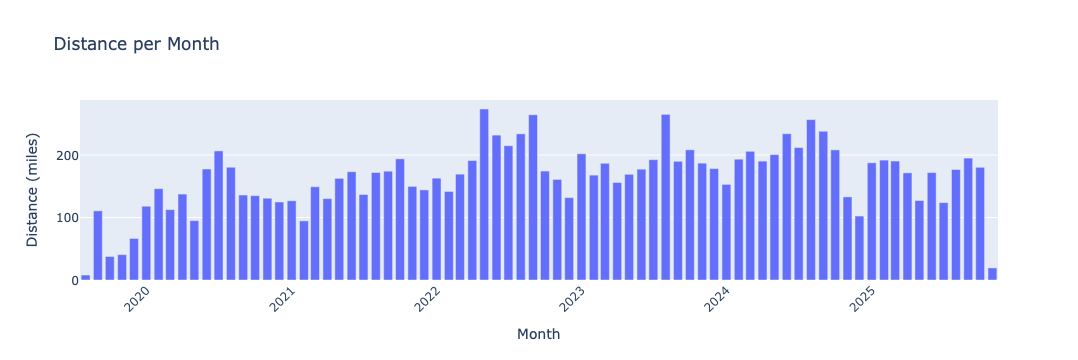

In [35]:
import plotly.express as px

activities['period'] = pd.to_datetime(activities['date']).dt.strftime('%Y-%m')
activities['distance_miles'] = activities['distance_meters'] / 1609.34

monthly_stats = activities.groupby('period').agg({
    'distance_miles': 'sum',
    'strava_activity_id': 'count'
}).reset_index()
monthly_stats.rename(columns={'strava_activity_id': 'count'}, inplace=True)

fig = px.bar(monthly_stats, x='period', y='distance_miles', 
             hover_data={'distance_miles': ':.1f', 'count': True},
             title='Distance per Month')
fig.update_layout(xaxis_tickangle=-45, yaxis_title='Distance (miles)', xaxis_title='Month')
fig.show()